# Assignment 1 – Polynomial Regression using ``torch.nn.Module``

- Please create a copy of this notebook onto your own Drive before working on it: `File-->Save a copy in Drive`
- Please submit your ipynb file named with your initials, e.g. `YGM-Assignment1.ipynb` with **the CODE cells output visible** to support your answers and **TEXTUAL answers given as comments** in the code cells.
- Deadline for submission is **midnight, Friday, March 18th.**

## Neural Network Model for Polynomial Regression
Your task is to build a neural network for the function $y = x^2 + 3x$

Requirements:
- You MUST use `torch.nn.Module` to define your neural network class.
- The training data should have **10 input values, $x$, and the correct corresponding output values, $y$,** for the function $y = x^2 + 3x$
- The NN may have **maximum TWO hidden layers**.
- You may use a **maximum of 500 neuron units in each hidden layer**.
- You may train over a **maximum of 1000 epochs**.
- Use suitable activation functions that have been covered in class.
- You MUST use the **Adam optimiser, `torch.optim.Adam()`** and the **MSE loss function**.
- **IMPORTANT:** Your model must have a **LOSS OF LESS THAN 0.01** at the end of training.
- **Train your model at least 3 times** to see that the final loss value is stable across all three runs.
- Print the loss at every 25th iteration.
- Test the model on $x=10$.
- **Save your training loss** at every iteration.

Note:
- If your model does not achieve a loss of less than 0.01, you will still be awarded marks for `Q7 – Q10` as long as you can explain your answers accordingly.

In [ ]:
import torch
import torch.nn as nn

# 1. Define training data for a the mathematical formula y = x^2 + 3x (3)

x = torch.tensor([[-5],[-4],[-3],[-2],[-1],[0],[1],[2],[3],[4]],dtype = torch.float32)
y = torch.tensor([[10],[4],[0],[-2],[-2],[0],[4],[10],[18],[28]],dtype = torch.float32)

# 2. Define NN class (10)

class MyNN(nn.Module):

    def __init__(self, hidden_size):
        super().__init__()
        self.poly1 = nn.Linear(1, hidden_size)
        self.poly2 = nn.Linear(hidden_size, hidden_size)
        self.activation = nn.ReLU()
        self.poly3 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.poly1(x)
        x = self.activation(x)
        x = self.poly2(x)
        x = self.activation(x)
        x = self.poly3(x)
        return x

# 3. Create an instance of NN model (2)
hidden_size = 400
model = MyNN(hidden_size)

# 4. Loss and Optimiser (2)
learning_rate = 0.01
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr = learning_rate)


# 5. Training loop
# number of epochs need to be less than 1000
num_epochs = 500
training_loss = []
epoch_ls = []

for epoch in range(num_epochs):
  # 5.1 Forward pass (2)
  y_pred = model(x)
  loss = loss_fn(y_pred, y)

  # 5.2 Backward pass (3)
  opt.zero_grad()
  loss.backward()
  opt.step()

  # 5.3 Print loss every 25th epoch (1)
  if (epoch + 1) % 25 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

  # 5.4 Save training loss at every epoch (2)
  training_loss.append(loss.item())
  epoch_ls.append(epoch)

# Ensure that loss is less than 0.01 at the end if training consistently (3)

Epoch 25/500, Loss=4.2861 
Epoch 50/500, Loss=0.3647 
Epoch 75/500, Loss=0.1487 
Epoch 100/500, Loss=0.0610 
Epoch 125/500, Loss=0.0266 
Epoch 150/500, Loss=0.0018 
Epoch 175/500, Loss=0.0001 
Epoch 200/500, Loss=0.0000 
Epoch 225/500, Loss=0.0000 
Epoch 250/500, Loss=0.0000 
Epoch 275/500, Loss=0.0042 
Epoch 300/500, Loss=0.0057 
Epoch 325/500, Loss=0.0004 
Epoch 350/500, Loss=0.0000 
Epoch 375/500, Loss=0.0000 
Epoch 400/500, Loss=0.0000 
Epoch 425/500, Loss=0.0001 
Epoch 450/500, Loss=0.0092 
Epoch 475/500, Loss=0.0002 
Epoch 500/500, Loss=0.0003 


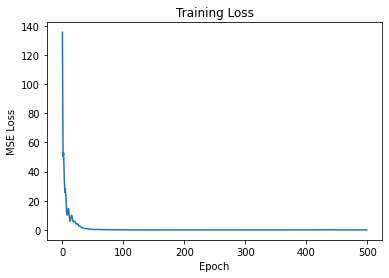

In [ ]:
# 6. Visualize (3)
# Plot the landscape of your training loss (MSE loss) saved for every epoch.
# y-axis would mean MSE loss and x-axis would mean the epoch of your training.
# Hint: you should plot (1,first MSE loss), ... ,(last epoch number,last MSE loss)
import matplotlib.pyplot as plt

plt.title("Training Loss")
plt.plot(epoch_ls, training_loss)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()



In [ ]:
# 7. Prediction (2)
# Let's use the model on a new number x, defined as a tensor
test_num = 40
test = torch.tensor([test_num], dtype=torch.float32)

# Get the model's prediction for this new x
print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f}')



Model prediction for 40 is 367.2011


In [ ]:
# Make sure the output of your code cells support your answers below:

# Q8. Describe how the loss changed over time during training. (2)

# The loss decreases over time during the training.

# Q9. Is the prediction for x=10 close enough to the ideal value of 130?
# Why do you think the prediction is or isn't close enough to the ideal value? (2)

# The prediction is not close to the ideal value. This is probably due to the
# training data. With the training data being so small in scale and very close
# together x values, it does not fully depict the function for the model.

# Q10. What are the predictions for x=20 and x=100? Based on these predictions,
# comment on whether the model has captured the relationship between the training inputs and outputs. (2)

# For x = 20, the predicted value was 179.7041 when the actual value is 460.
# For x = 40, the predicted vlaue was 367.2011 when the actual value is 1720.
# The model has not capture the relationship of the polynomial function
# between the training input and the outputs.

# Q11. Apart from tweaking the number of epochs and the number of neuron units in the hidden layer, think
# of AT LEAST ONE more thing you would do to try to improve the model. You do NOT have to follow the
# requirements nor to implement anything. (1)

# I would provide much more training data. The dataset was too small to capture
# the polynomial relationship.
